Data Preprocessing

In [1]:
import pandas as pd
import math
import warnings

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HRV data 20201209.xlsx to HRV data 20201209.xlsx


In [4]:
df = pd.read_excel('/content/HRV data 20201209.xlsx')

In [5]:
#df.head()
df.head(10)

,SI > 1,Sepsis3,Mean.rate,Coefficient.of.variation,Poincar..SD1,Poincar..SD2,LF.HF.ratio.LombScargle,LF.Power.LombScargle,HF.Power.LombScargle,DFA.Alpha.1,...,ARerr,histSI,MultiFractal_c1,MultiFractal_c2,SDLEalpha,SDLEmean,QSE,Hurst.exponent,mean,median
0,0,1,89.41116,0.130259,0.045349,0.115000,1.996490,0.165480,0.082885,0.360711,...,0.012382,97.90655,0.450963,-0.390230,0.098868,-0.068385,-3.370129,0.293162,0.014667,0.01
1,0,1,86.80576,0.026824,0.009504,0.024437,0.879037,0.111384,0.126711,1.045326,...,0.007553,97.16291,0.653894,-0.099736,0.002335,-0.070684,-3.613631,0.189769,0.018400,0.01
2,0,1,85.50767,0.035203,0.009715,0.033555,2.542225,0.258164,0.101550,1.191519,...,0.007291,96.94639,0.446524,-0.215889,-0.031113,-0.022195,-3.436350,0.842615,0.007567,0.01
3,0,1,95.12748,0.013182,0.006829,0.009571,1.596207,0.179256,0.112301,0.604070,...,0.005767,99.34581,0.409963,0.119166,-0.049628,-0.184725,-4.591196,0.916986,0.010100,0.01
4,0,1,93.37041,0.016777,0.006921,0.013585,1.128488,0.163068,0.144501,1.055573,...,0.005666,95.76449,0.478948,0.090387,-1.652177,-0.312528,-4.213691,0.680459,0.009867,0.01
5,0,1,94.87082,0.032013,0.015191,0.024270,0.710120,0.129688,0.182628,0.733558,...,0.010033,99.06409,0.799241,-0.139752,-0.239194,-0.205732,-4.127018,0.690343,0.015333,0.01
6,0,1,95.84244,0.032725,0.010361,0.027056,2.085436,0.207378,0.099441,0.881066,...,0.006720,97.06444,0.784208,-0.078641,-0.126905,-0.134878,-3.926406,0.945635,0.006733,0.01
7,0,1,94.17284,0.019716,0.007228,0.016228,1.324898,0.203031,0.153242,0.939205,...,0.006612,99.24341,0.609458,-0.033957,-0.051260,-0.128325,-3.692735,0.967044,0.006833,0.01
8,0,1,95.95774,0.027788,0.009619,0.022611,1.046992,0.155267,0.148298,1.051465,...,0.007303,98.13331,0.555743,-0.041051,-0.557746,-0.253613,-4.216228,0.972183,0.004400,0.00
9,0,1,99.81212,0.033030,0.011748,0.025504,1.129404,0.099962,0.088509,0.768854,...,0.005745,97.06320,0.779804,-0.003565,0.174318,0.054985,-4.011369,0.098404,0.006433,0.01


In [6]:
df.shape

(4314, 59)

In [7]:
df.info

<bound method DataFrame.info of       SI > 1  Sepsis3   Mean.rate  Coefficient.of.variation  Poincar..SD1  \
0          0        1   89.411160                  0.130259      0.045349   
1          0        1   86.805760                  0.026824      0.009504   
2          0        1   85.507670                  0.035203      0.009715   
3          0        1   95.127480                  0.013182      0.006829   
4          0        1   93.370410                  0.016777      0.006921   
...      ...      ...         ...                       ...           ...   
4309       0        0  111.683756                  0.031518      0.015239   
4310       0        0  111.409998                  0.048524      0.021231   
4311       0        0  114.402754                  0.053378      0.009238   
4312       0        0  120.986143                  0.049403      0.012527   
4313       0        0  109.532809                  0.023737      0.007142   

      Poincar..SD2  LF.HF.ratio.LombScargle  LF.Power.LombScargle  \
0         0.115000                 1.996490              0.165480   
1         0.024437                 0.879037              0.111384   
2         0.033555                 2.542225              0.258164   
3         0.009571                 1.596207              0.179256   
4         0.013585                 1.128488              0.163068   
...            ...                      ...                   ...   
4309      0.018471                 0.495158              0.101661   
4310      0.030251                 0.468523              0.094327   
4311      0.038498                 3.641941              0.087207   
4312      0.032305                 1.138312              0.085840   
4313      0.016945                 3.862068              0.285280   

      HF.Power.LombScargle  DFA.Alpha.1  ...     ARerr     histSI  \
0                 0.082885     0.360711  ...  0.012382  97.906550   
1                 0.126711     1.045326  ...  0.007553  97.162910   
2                 0.101550     1.191519  ...  0.007291  96.946390   
3                 0.112301     0.604070  ...  0.005767  99.345810   
4                 0.144501     1.055573  ...  0.005666  95.764490   
...                    ...          ...  ...       ...        ...   
4309              0.205310     0.546609  ...  0.014200  98.906751   
4310              0.201329     0.637414  ...  0.019933  98.556229   
4311              0.023945     1.047913  ...  0.008743  98.418028   
4312              0.075410     0.756287  ...  0.012596  99.335093   
4313              0.073867     1.166494  ...  0.007293  95.814713   

      MultiFractal_c1  MultiFractal_c2  SDLEalpha  SDLEmean       QSE  \
0            0.450963        -0.390230   0.098868 -0.068385 -3.370129   
1            0.653894        -0.099736   0.002335 -0.070684 -3.613631   
2            0.446524        -0.215889  -0.031113 -0.022195 -3.436350   
3            0.409963         0.119166  -0.049628 -0.184725 -4.591196   
4            0.478948         0.090387  -1.652177 -0.312528 -4.213691   
...               ...              ...        ...       ...       ...   
4309         1.012050        -0.992719   0.023103 -0.715911 -4.556762   
4310         0.628339        -0.800700   0.091253 -0.528941 -3.839154   
4311         0.793163        -0.214894  -0.547045 -0.244698 -4.214287   
4312         0.837178        -0.379670  -0.677758 -0.421804 -4.181270   
4313         0.890485        -0.199283  -0.880753 -0.551186 -4.127654   

      Hurst.exponent      mean  median  
0           0.293162  0.014667    0.01  
1           0.189769  0.018400    0.01  
2           0.842615  0.007567    0.01  
3           0.916986  0.010100    0.01  
4           0.680459  0.009867    0.01  
...              ...       ...     ...  
4309        0.810458  0.023167    0.02  
4310        0.795214  0.023100    0.02  
4311        0.106483  0.060133    0.03  
4312        0.050125  0.069667    0.04  
4313        0.847800  0.023167    0.02  

[4314 rows x 59

In [8]:
missing_data = df.isna().sum()
print(missing_data)

SI > 1                               0
Sepsis3                              0
Mean.rate                            0
Coefficient.of.variation             0
Poincar..SD1                         0
Poincar..SD2                         0
LF.HF.ratio.LombScargle              0
LF.Power.LombScargle                 0
HF.Power.LombScargle                 0
DFA.Alpha.1                          0
DFA.Alpha.2                          0
Largest.Lyapunov.exponent            0
Correlation.dimension                0
Power.Law.Slope.LombScargle          0
Power.Law.Y.Intercept.LombScargle    0
DFA.AUC                              0
Multiscale.Entropy                   0
VLF.Power.LombScargle                0
Complexity                           0
eScaleE                              0
pR                                   0
pD                                   0
dlmax                                0
sedl                                 0
pDpR                                 0
pL                       

In [13]:
import pandas as pd
import math

# Load the dataset
file_path = '/content/HRV data 20201209.xlsx'
data = pd.read_excel(file_path)

# Calculate mean value of a feature
mean_value = data['Mean.rate'].mean()
print(round(mean_value, 1), math.ceil(mean_value))

# Calculate the mean value of the specified feature, excluding 0.0
mean_value = data[data['Mean.rate'] != 0.0]['Mean.rate'].mean()
print(round(mean_value, 1), math.ceil(mean_value))

# Calculate the mean value of the specified feature, excluding 0.0 and NaN
mean_value = data[(data['Mean.rate'] != 0.0) & (~data['Mean.rate'].isna())]['Mean.rate'].mean()
print(round(mean_value, 1), math.ceil(mean_value))


89.5 90
89.5 90
89.5 90


In [14]:
# Replace NaN values in a specific feature with the mean of that feature
df['Mean.rate'].fillna(math.ceil(mean_value), inplace=True)
print(round(mean_value,1), math.ceil(mean_value))

89.5 90


<ipython-input-14-978ec7d3af9c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mean.rate'].fillna(math.ceil(mean_value), inplace=True)


In [15]:
# Calculate and display the minimum and maximum values for each feature (column)
min_max_values = df.aggregate(['min', 'max'])
print("Minimum and Maximum Values for Each Feature:")
print(min_max_values)

Minimum and Maximum Values for Each Feature:
     SI > 1  Sepsis3   Mean.rate  Coefficient.of.variation  Poincar..SD1  \
min       0        0   56.485260                  0.006346      0.001003   
max       1        1  183.984092                  0.272920      0.063498   

     Poincar..SD2  LF.HF.ratio.LombScargle  LF.Power.LombScargle  \
min      0.004482                 0.038393              0.007290   
max      0.305502                47.849574              0.453868   

     HF.Power.LombScargle  DFA.Alpha.1  ...     ARerr     histSI  \
min              0.002584     0.199991  ...  0.003244   84.74784   
max              0.594912     2.250717  ...  0.046143  100.00000   

     MultiFractal_c1  MultiFractal_c2  SDLEalpha  SDLEmean       QSE  \
min         0.105711        -2.126619  -6.192296 -1.650575 -5.563214   
max         1.292675         0.540406   4.812197  0.336106 -1.923490   

     Hurst.exponent      mean  median  
min       -0.157740  0.004400     0.0  
max        1.146094

In [17]:
# Save the updated DataFrame back to a CSV file
df.to_csv('HRV_Preprocessed.csv',index=False)

In [24]:
# Download the file to your local PC
files.download('HRV_Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Unsupervised Learning

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from google.colab import files
uploaded = files.upload()

Saving HRV_Preprocessed.csv to HRV_Preprocessed (1).csv


In [26]:
df = pd.read_csv('/content/HRV_Preprocessed (1).csv')

In [28]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose number of clusters based on your data
data['Cluster'] = kmeans.fit_predict(data[['Mean.rate', 'Coefficient.of.variation']])
print(data['Cluster'].value_counts())


Cluster
0    1710
2    1534
1    1070
Name: count, dtype: int64


In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
data_pca = pca.fit_transform(data.select_dtypes(include='number').dropna())
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Explained variance ratio: [0.82897924 0.13157338]


# Feature Selection Technique

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Feature Selection using RFE
X = data.drop(['Sepsis3'], axis=1).select_dtypes(include='number')  # Example
y = data['Sepsis3']
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')


Selected Features: Index(['DFA.AUC', 'aFdP', 'fFdP', 'QSE', 'mean'], dtype='object')


# Supervised Learning

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}


# Performance Measures


Random Forest Results:
Accuracy: 0.9135135135135135
Confusion Matrix:
 [[1119   26]
 [  86   64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1145
           1       0.71      0.43      0.53       150

    accuracy                           0.91      1295
   macro avg       0.82      0.70      0.74      1295
weighted avg       0.90      0.91      0.90      1295


SVM Results:
Accuracy: 0.8841698841698842
Confusion Matrix:
 [[1145    0]
 [ 150    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1145
           1       0.00      0.00      0.00       150

    accuracy                           0.88      1295
   macro avg       0.44      0.50      0.47      1295
weighted avg       0.78      0.88      0.83      1295


Decision Tree Results:
Accuracy: 0.888030888030888
Confusion Matrix:
 [[1083   62]
 [  83   67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1145
           1       0.52      0.45      0.48       150

    accuracy                           0.89      1295
   macro avg       0.72      0.70      0.71      1295
weighted avg       0.88      0.89      0.88      1295


KNN Results:
Accuracy: 0.9027027027027027
Confusion Matrix:
 [[1108   37]
 [  89   61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.9

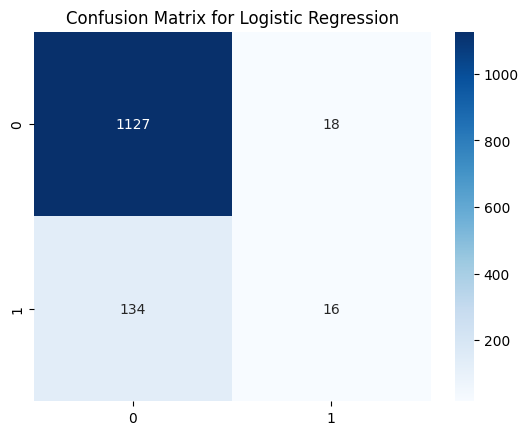

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {name}")
plt.show()


# Feature Extraction on a New Dataset

In [36]:
print(df_titanic.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [37]:
# Example: Titanic dataset
df_titanic = pd.read_csv('titanic.csv')  # Replace with your dataset
df_titanic['FamilySize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard']
df_titanic['IsAlone'] = (df_titanic['FamilySize'] == 0).astype(int)

# Train classifiers on manually created features
X_titanic = df_titanic[['Pclass', 'Age', 'FamilySize', 'IsAlone']].fillna(0)
y_titanic = df_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)


# Automated Feature Extraction

In [39]:
from sklearn.decomposition import PCA

# Set n_components to 2 or 3, depending on your visualization needs
pca = PCA(n_components=2)  # Reduce to 2 dimensions for better visualization
X_pca = pca.fit_transform(X_titanic)

# Display explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.98425536 0.01225314]


In [47]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

# Define autoencoder
input_dim = X_titanic.shape[1]  # Number of features
autoencoder = Sequential([
    Input(shape=(input_dim,)),  # Define input shape explicitly
    Dense(10, activation='relu'),  # Encoding layer
    Dense(input_dim, activation='linear')  # Decoding layer
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(X_titanic, X_titanic, epochs=50, batch_size=32, verbose=1)

# Ensure the autoencoder is built by running a dummy prediction
autoencoder.predict(X_titanic[:1])  # Just one sample to trigger the model's build



Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 249.0100
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 214.9642
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.2902
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156.2506
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.1048
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.5341
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.8740
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.5683
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5290
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0603
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0809
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6447
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7349
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9953
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7086
Epoc

array([[ 2.7036936, 21.737783 ,  1.1557679,  0.5863109]], dtype=float32)